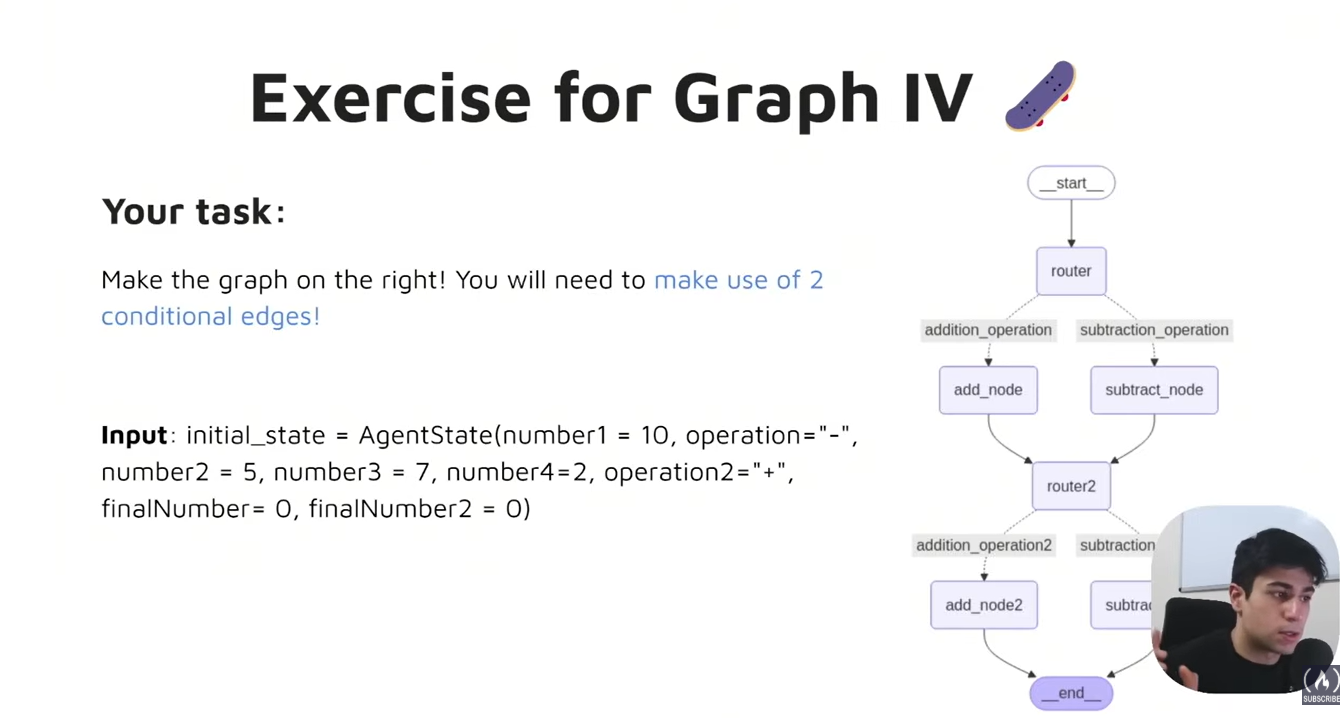

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [3]:
class AgentState(TypedDict):
    number1:int
    number2:int
    number3:int
    number4:int
    operation1:str
    operation2:str
    output1:int
    output2:int

In [4]:
def addition1(state:AgentState) -> AgentState:
    """operations addition among number1 and number2"""

    state["output1"] = state["number1"] + state["number2"]

    return state

In [5]:
def addition2(state:AgentState) -> AgentState:
    """operations addition among number3 and number4"""

    state["output2"] = state["number3"] + state["number4"]

    return state

In [6]:
def subtraction1(state:AgentState) -> AgentState:
    """operations subtraction among number1 and number2""" 

    state["output1"] = state["number1"] - state["number2"]

    return state


In [7]:
def subtraction2(state:AgentState) -> AgentState:
    """operations subtraction among number3 and number4""" 

    state["output2"] = state["number3"] - state["number4"]

    return state

In [8]:
def decide_operation_node_1(state: AgentState) -> AgentState:

    """Decides whether the operation is addition or subtraction among number1 and number2"""

    if state["operation1"] == "+":

        return "addition_operation"
    
    elif state["operation1"] == "-":

        return "subtraction_operation"

In [9]:
def decide_operation_node_2(state: AgentState) -> AgentState:

    """Decides whether the operation is addition or subtraction among number3 and number4"""

    if state["operation2"] == "+":

        return "addition_operation"
    
    elif state["operation2"] == "-":

        return "subtraction_operation"

In [10]:
graph = StateGraph(state_schema= AgentState)

In [11]:
graph.add_node("add1",addition1)
graph.add_node("sub1",subtraction1)
graph.add_node("add2",addition2)
graph.add_node("sub2",subtraction2)
graph.add_node("router1", lambda state : state)
graph.add_node("router2", lambda state : state)


graph.add_edge(START,"router1")
graph.add_conditional_edges(
    source = "router1",
    path = decide_operation_node_1,
    
    path_map = {
        "addition_operation" : "add1",
        "subtraction_operation" : "sub1"
    }
)

graph.add_edge("add1","router2")
graph.add_edge("sub1","router2")

graph.add_conditional_edges(
    source= "router2",
    path= decide_operation_node_2,
    path_map= {
        "addition_operation": "add2",
        "subtraction_operation": "sub2"
    }
)

graph.add_edge("add2",END)
graph.add_edge("sub2",END)


app = graph.compile()

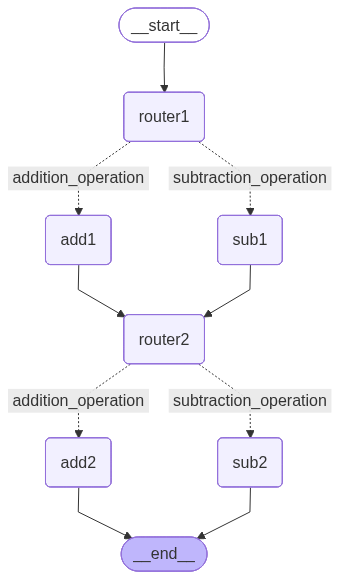

In [12]:
app

In [13]:
app.invoke(input = {
    "number1" : 10,
    "number2" : 20,
    "number3" : 30,
    "number4" : 40,
    "operation1" : "+",
    "operation2" : "+",
    "output1" : 0,
    "output2": 0
})

{'number1': 10,
 'number2': 20,
 'number3': 30,
 'number4': 40,
 'operation1': '+',
 'operation2': '+',
 'output1': 30,
 'output2': 70}

In [14]:
app.invoke(input = {
    "number1" : 10,
    "number2" : 20,
    "number3" : 30,
    "number4" : 40,
    "operation1" : "-",
    "operation2" : "+",
    "output1" : 0,
    "output2": 0
})

{'number1': 10,
 'number2': 20,
 'number3': 30,
 'number4': 40,
 'operation1': '-',
 'operation2': '+',
 'output1': -10,
 'output2': 70}